In [98]:
#bibliotecas usadas 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz


In [99]:
#carregamento da base de dados 
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [100]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [101]:
#conversão de atributos categóricos em atributos numéricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])


In [102]:
#divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


In [103]:
#criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)


DecisionTreeClassifier()

In [104]:
#exportação da árvore de decisão para o formato .dot para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')


In [105]:
#obtenção das previsões
previsoes = arvore.predict(X_teste)


In [106]:
#taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7033333333333334

In [107]:
#matriz de confusão
matriz = confusion_matrix(y_teste, previsoes)
matriz

array([[ 45,  41],
       [ 48, 166]], dtype=int64)

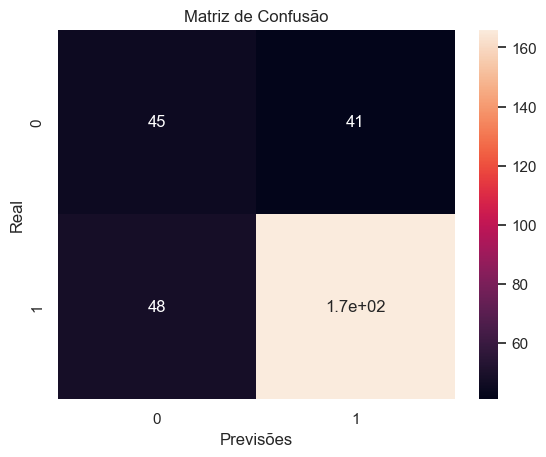

In [108]:
#gráfico da matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matriz, annot=True)
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [109]:
pip install scikit-learn

In [110]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


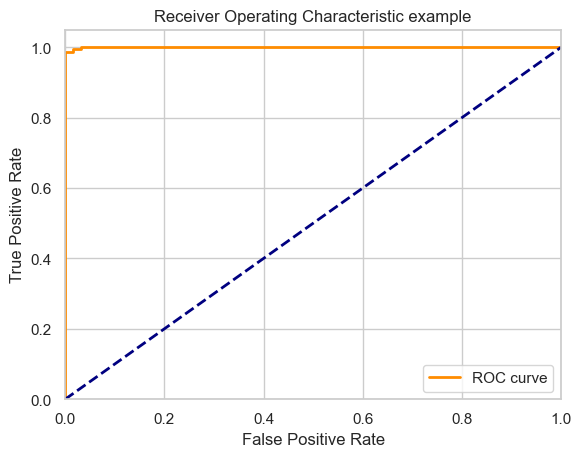

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_curve(y_true, y_score):
    thresholds = np.sort(np.unique(y_score))
    tprs = []
    fprs = []
    num_positive_cases = sum(y_true)
    num_negative_cases = len(y_true) - num_positive_cases
    for threshold in thresholds:
        # With the current threshold, classify the scores into positive and negative
        predicted_positive = y_score >= threshold
        # Calculate the true positive rate and false positive rate
        true_positive = np.sum(predicted_positive * y_true)
        false_positive = np.sum(predicted_positive) - true_positive
        tpr = true_positive / num_positive_cases
        fpr = false_positive / num_negative_cases
        tprs.append(tpr)
        fprs.append(fpr)
    return fprs, tprs, thresholds.tolist()

# Generate a binary classification dataset.
np.random.seed(42)
X = np.random.normal(size=(1000, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = X[:600], X[600:], y[:600], y[600:]

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, _ = calculate_roc_curve(y_test, y_score)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder

# Instanciando o codificador
encoder = LabelEncoder()

# Ajustando e transformando os rótulos de treinamento
y_treinamento = encoder.fit_transform(y_treinamento)

# Transformando os rótulos de teste
y_teste = encoder.transform(y_teste)

# Agora você pode ajustar o modelo
model.fit(X_treinamento, y_treinamento)

C:\Users\55219\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
import xgboost as xgb

# Criação do modelo
model = xgb.XGBClassifier()

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento)

# Obtendo a importância das características
importancias = model.feature_importances_
importancias

array([0.14000478, 0.06130522, 0.05258106, 0.04938936, 0.04079585,
       0.0483722 , 0.03461785, 0.03270493, 0.0330846 , 0.05682671,
       0.03756128, 0.04463476, 0.03260849, 0.07009386, 0.04611253,
       0.03815842, 0.03074979, 0.05131709, 0.04917548, 0.04990571],
      dtype=float32)

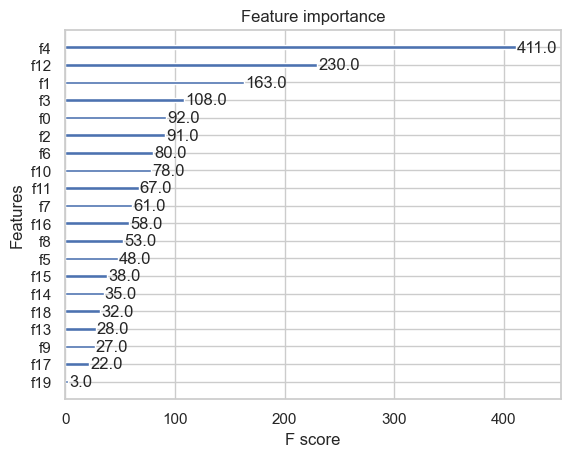

In [114]:
#grafico de importancia das caracteristicas
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


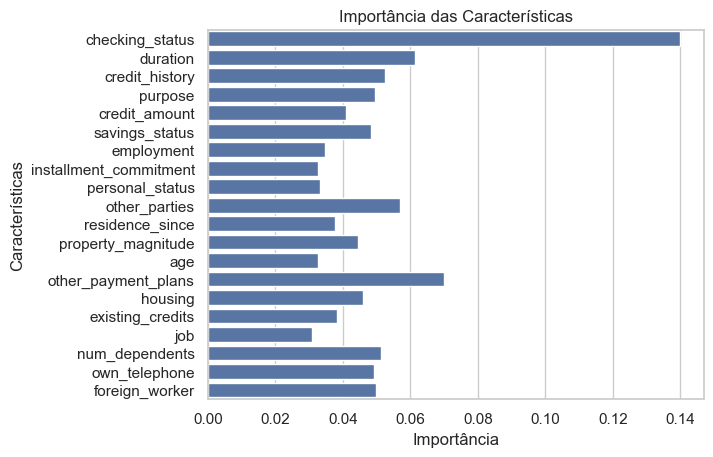

In [115]:
# Verifique o número de características usadas para treinar o modelo
num_caracteristicas = previsores.shape[1]

# Use apenas as primeiras 'num_caracteristicas' colunas
nomes_colunas = credito.columns[:num_caracteristicas]

# Agora, 'model.feature_importances_' e 'nomes_colunas' devem ter o mesmo comprimento
ax = sns.barplot(x=model.feature_importances_, y=nomes_colunas)

# Adiciona rótulos e título
ax.set_xlabel("Importância")
ax.set_ylabel("Características")
plt.title("Importância das Características")

# Mostra o gráfico
plt.show()

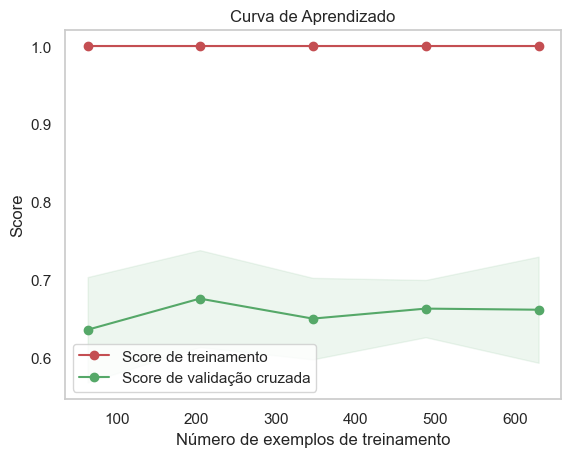

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Use o seu modelo de árvore de decisão e os seus dados de treinamento
train_sizes, train_scores, test_scores = learning_curve(arvore, X_treinamento, y_treinamento, cv=10)

# Calcule a média e o desvio padrão para os scores de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Crie o gráfico
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Número de exemplos de treinamento")
plt.ylabel("Score")
plt.grid()

# Preencha a área entre as linhas com a cor cinza
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Desenhe as linhas de score médio para os conjuntos de treinamento e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validação cruzada")

plt.legend(loc="best")

# Mostre o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


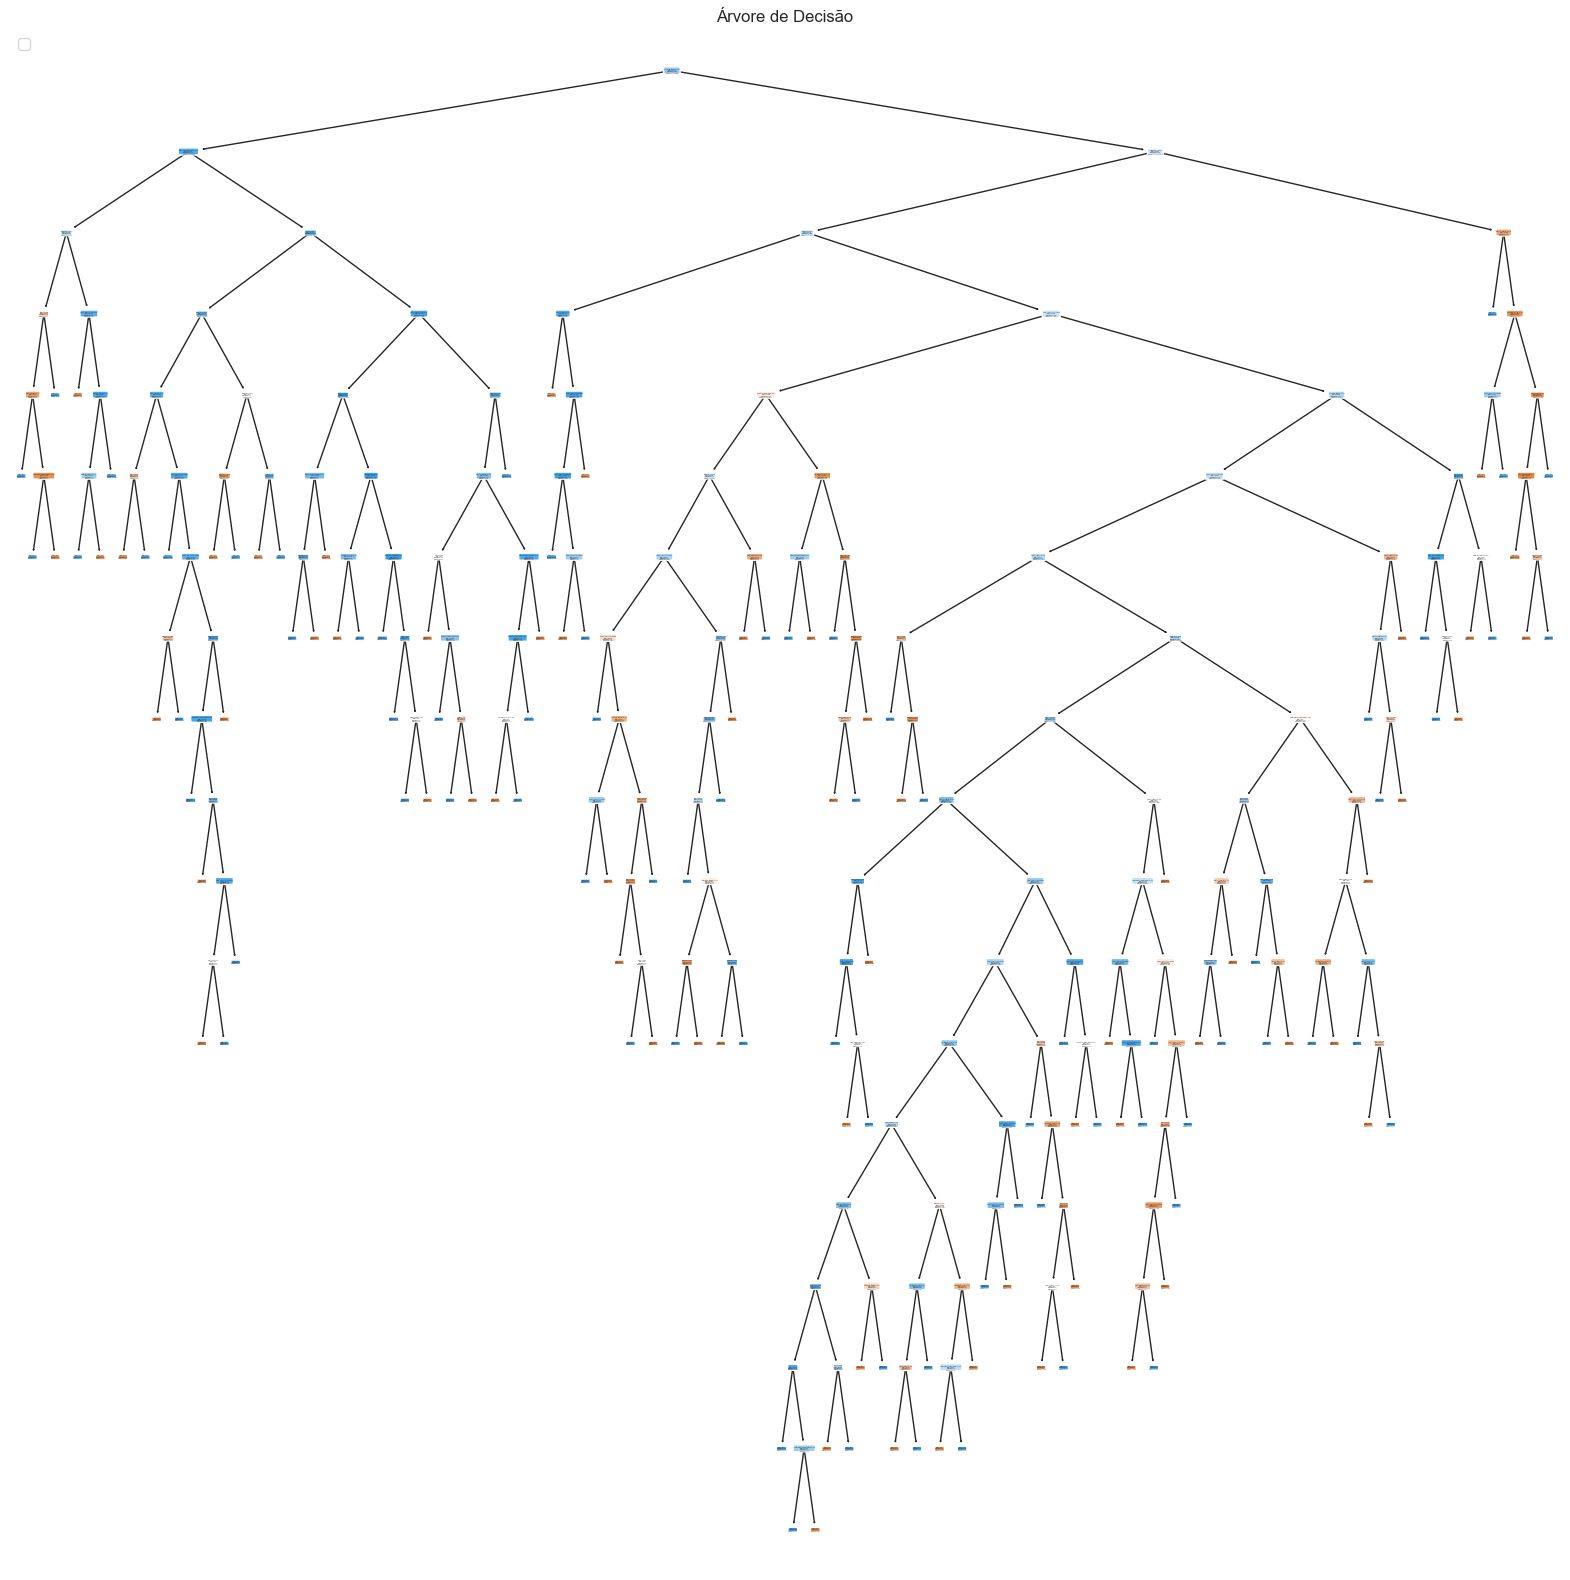

In [118]:
#gere um gráfico com a arvore de decisão
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(arvore, filled=True, rounded=True, feature_names=credito.columns)
plt.title('Árvore de Decisão')
plt.legend(loc='upper left')
plt.show()

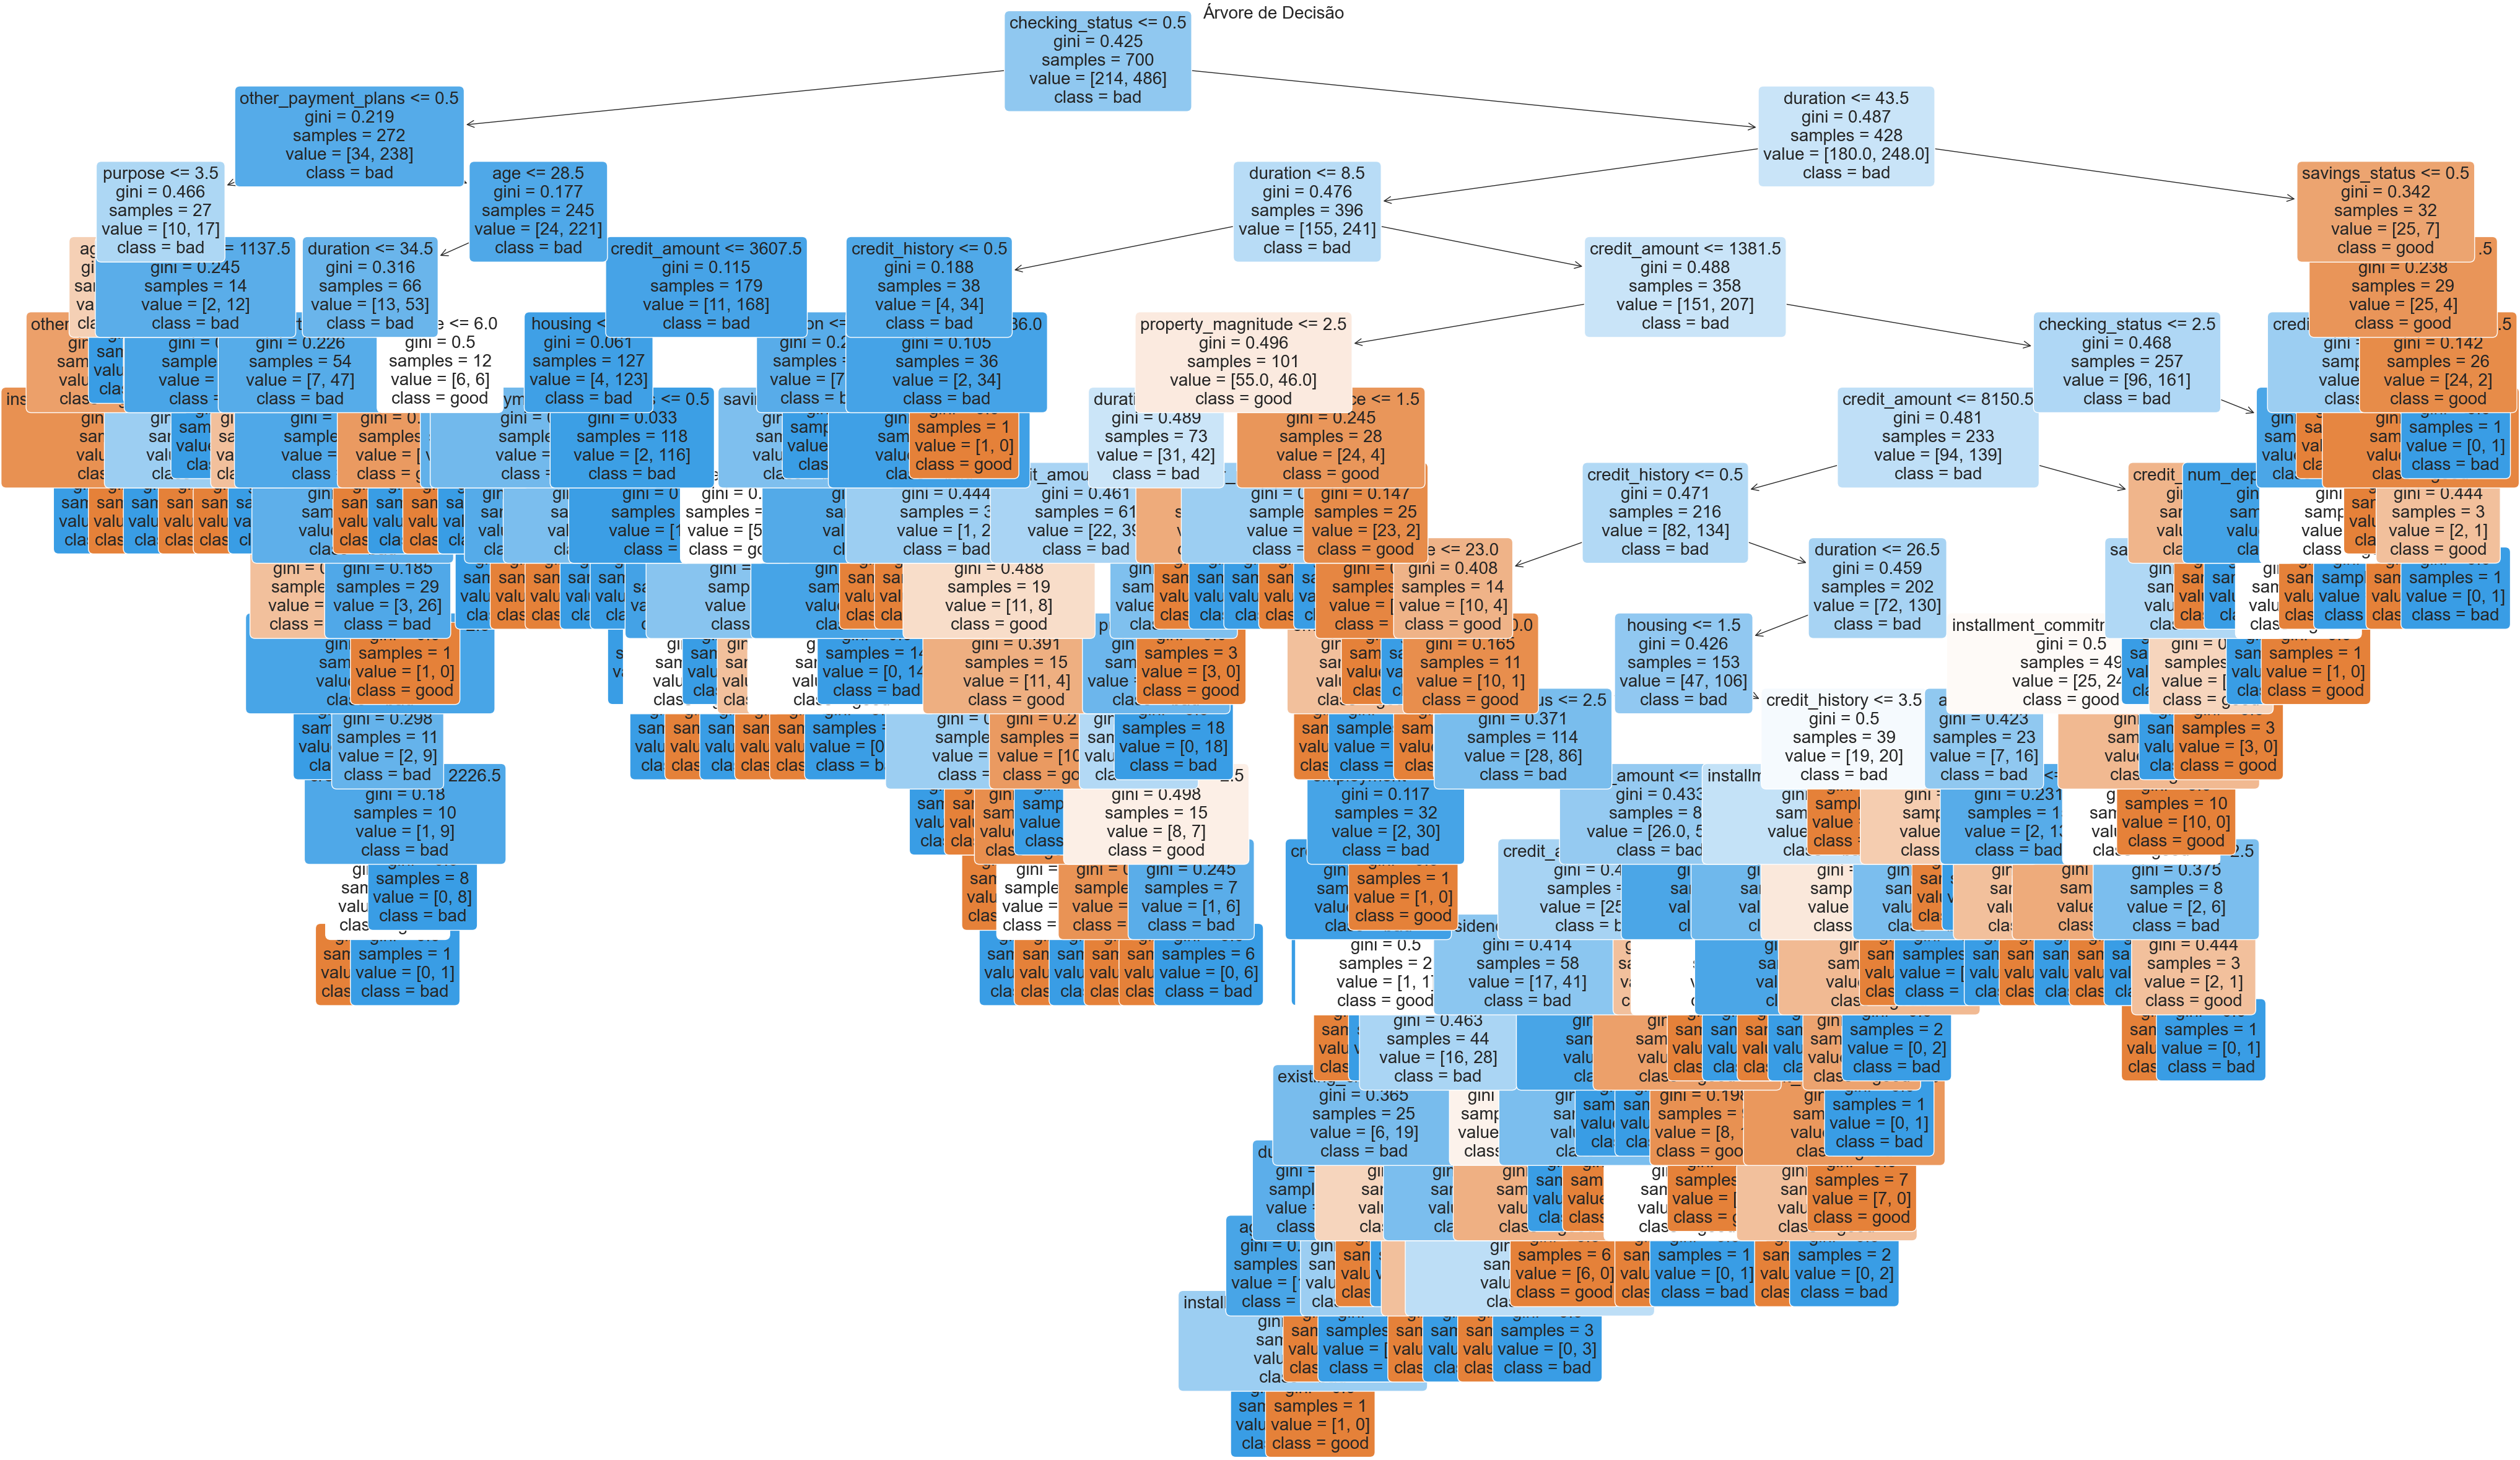

In [122]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 30))  # Aumente o tamanho da figura
plot_tree(arvore, filled=True, rounded=True, feature_names=credito.columns, 
          class_names=['good', 'bad'],  # Substitua 'Classe1' e 'Classe2' pelos nomes reais das suas classes
          fontsize=20)  # Aumente o tamanho da fonte para facilitar a leitura
plt.title('Árvore de Decisão', fontsize=20)  # Aumente o tamanho da fonte do título
plt.show()